**TOP 6 LEAGUES FOOTBALL PLAYERS WAGE PREDICTION PROJECT**

**Objective**

The main goal of this project is to predict player wages using a dataset that includes various player and club attributes

**Scope**

This project focuses on a comparative analysis of players from the top 6 football leagues in the world, examining different parameters to understand wage determinants.

**About The Project**

Overview:

The project aims to build a predictive model for player wages.
The analysis includes features such as age, number of appearances, position, number of caps, club, and league.
A comparative analysis is conducted to identify patterns and differences among the top 6 football leagues


 **Dataset Description**

Columns:
Age: Age of the player.

Wage: Weekly wage of the player.

Apps: Number of appearances the player has made for the club.

Position: The position in which the player plays.

Caps: Number of international caps the player has earned.

Club: The club the player currently plays for.
League: The league in which the player's club competes


 **Data Collection and Preparation**

The data used  was collected from a secondary source.The source of the data is Kaggle Website and the following is the link for the data :
https://colab.research.google.com/drive/1mFpEEg_v7YpKhleAQCMDItD86hp3ASQZ#


**Setting Up the Environment**

This process involves setting up the virtual  machine (VM) or the Virtual Environment for coding and also importing the necessary libraries

In [1]:
#Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import statsmodels.api as sm
import plotly.express as px
import nltk
import spacy
import cv2


In [2]:
#importing the dataset
df=pd.read_csv('SalaryPrediction.csv')

**1. Data Description**

**Data Cleaning**

This process outline any steps taken to clean and preprocess the data, such as handling missing values, encoding categorical variables, and scaling numerical features.

In [3]:
# Print the first five rows of the dataset
print(df.head())

         Wage  Age       Club             League Nation    Position  Apps  \
0  46,427,000   23        PSG  Ligue 1 Uber Eats    FRA     Forward   190   
1  42,125,000   30        PSG  Ligue 1 Uber Eats    BRA   Midfilder   324   
2  34,821,000   35        PSG  Ligue 1 Uber Eats    ARG     Forward   585   
3  19,959,000   31  R. Madrid            La Liga    BEL     Forward   443   
4  19,500,000   31    Man UFC     Premier League    ESP  Goalkeeper   480   

   Caps  
0    57  
1   119  
2   162  
3   120  
4    45  


In [4]:
# Print the shape of the dataset
print(df.shape)

(3907, 8)


In [5]:
df

,Wage,Age,Club,League,Nation,Position,Apps,Caps
0,"46,427,000",23,PSG,Ligue 1 Uber Eats,FRA,Forward,190,57
1,"42,125,000",30,PSG,Ligue 1 Uber Eats,BRA,Midfilder,324,119
2,"34,821,000",35,PSG,Ligue 1 Uber Eats,ARG,Forward,585,162
3,"19,959,000",31,R. Madrid,La Liga,BEL,Forward,443,120
4,"19,500,000",31,Man UFC,Premier League,ESP,Goalkeeper,480,45
...,...,...,...,...,...,...,...,...
3902,"3,400",19,Vigo,La Liga,ESP,Defender,0,0
3903,"3,200",18,Famalicao,Primiera Liga,BRA,Goalkeeper,0,0
3904,"2,900",18,Vigo,La Liga,ESP,Forward,0,0
3905,"2,700",18,Vigo,La Liga,ESP,Defender,0,0


In [6]:
# Print the data types of each column
print(df.dtypes)

Wage        object
Age          int64
Club        object
League      object
Nation      object
Position    object
Apps         int64
Caps         int64
dtype: object


In [7]:
# Check the data type of the 'Wage' column
print(df['Wage'].dtype)

# If the 'Wage' column is not of type object (string), convert it
if df['Wage'].dtype != object:
    df['Wage'] = df['Wage'].astype(str)

# Now proceed with the string replacements and conversion to integer
df['Wage'] = df['Wage'].str.replace('[\$\,\.]', '', regex=True).astype(int)


object


In [8]:
#Now print the updated data types
print(df.dtypes)

Wage         int64
Age          int64
Club        object
League      object
Nation      object
Position    object
Apps         int64
Caps         int64
dtype: object


In [9]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)


Wage        0
Age         0
Club        0
League      0
Nation      0
Position    0
Apps        0
Caps        0
dtype: int64


**3.Exploratory Data Analysis**

Exploratory Data Analysis (EDA) is a critical process in data analysis that involves examining the main characteristics of the data, often through visualizations and summary statistics, to gain insights and understanding before performing more complex analyses.

The objective of EDA is to:


*   **Understand the data** :Get a clear understanding of the data structure, variables, and relationships.
*   **Detect Anomalies**: Identify any anomalies or outliers that could skew the analysis.

*   **Generate Hypotheses**: Formulate hypotheses that can be tested with more rigorous statistical methods.

*   **Inform Further Analysis**: Provide insights that guide the choice of further data processing and modeling techniques.


**Data Features **

In [10]:
print(df.head())
print(df.shape)
print(df.dtypes)


       Wage  Age       Club             League Nation    Position  Apps  Caps
0  46427000   23        PSG  Ligue 1 Uber Eats    FRA     Forward   190    57
1  42125000   30        PSG  Ligue 1 Uber Eats    BRA   Midfilder   324   119
2  34821000   35        PSG  Ligue 1 Uber Eats    ARG     Forward   585   162
3  19959000   31  R. Madrid            La Liga    BEL     Forward   443   120
4  19500000   31    Man UFC     Premier League    ESP  Goalkeeper   480    45
(3907, 8)
Wage         int64
Age          int64
Club        object
League      object
Nation      object
Position    object
Apps         int64
Caps         int64
dtype: object


**Summary Statistics**

Summary Statistics provide a quick and simple description of a dataset, giving a sense of the data's overall distribution and central tendency. These statistics are crucial in the initial stages of data analysis, as they help to understand the basic features of the data and identify any potential issues or patterns that may need further exploration.

In [11]:
# Calculate descriptive statistics for numerical features
print(df.describe())

               Wage          Age         Apps         Caps
count  3.907000e+03  3907.000000  3907.000000  3907.000000
mean   1.367959e+06    24.120553   140.057077     8.926542
std    2.589857e+06     4.935638   131.694425    20.518234
min    1.400000e+03    18.000000     0.000000     0.000000
25%    7.550000e+04    20.000000    15.000000     0.000000
50%    3.990000e+05    24.000000   115.000000     0.000000
75%    1.560000e+06    28.000000   224.500000     6.000000
max    4.642700e+07    41.000000   715.000000   180.000000


In [12]:
mean_wage = df['Wage'].mean()
median_age = df['Age'].median()
mode_apps = df['Apps'].mode()[0]
std_wage = df['Wage'].std()
variance_wage = df['Wage'].var()
range_age = df['Age'].max() - df['Age'].min()
skewness_wage = df['Wage'].skew()
kurtosis_wage = df['Wage'].kurt()
percentile_25_caps = df['Caps'].quantile(0.25)
percentile_50_caps = df['Caps'].quantile(0.50)
percentile_75_caps = df['Caps'].quantile(0.75)

In [13]:
# Print additional statistics
print("Mean Wage:", mean_wage)
print("Median Age:", median_age)
print("Mode of Apps:", mode_apps)
print("Standard Deviation of Wage:", std_wage)
print("Variance of Wage:", variance_wage)
print("Range of Age:", range_age)
print("Skewness of Wage:", skewness_wage)
print("Kurtosis of Wage:", kurtosis_wage)
print("25th Percentile of Caps:", percentile_25_caps)
print("50th Percentile of Caps:", percentile_50_caps)
print("75th Percentile of Caps:", percentile_75_caps)

Mean Wage: 1367959.3678013822
Median Age: 24.0
Mode of Apps: 0
Standard Deviation of Wage: 2589856.758255691
Variance of Wage: 6707358028282.677
Range of Age: 23
Skewness of Wage: 5.373930277577515
Kurtosis of Wage: 55.06930572114166
25th Percentile of Caps: 0.0
50th Percentile of Caps: 0.0
75th Percentile of Caps: 6.0


**Explaining the components of Summary Statistics**

**Measures of Central Tendency:**


*   **Mean**: The average value of the dataset, calculated by summing all the values and dividing by the number of values.
*  **Median**: The middle value when the data is sorted in ascending order. If the dataset has an even number of values, the median is the average of the two middle values.
*   **Mode**: The value that appears most frequently in the dataset.

**Measures of Dispersion**


*   **Standard Deviation**: Indicates how spread out the values in the dataset are around the mean. A higher standard deviation means greater variability.
*   **Variance**: The square of the standard deviation, providing a measure of the spread of the data.


*  **Range**: The difference between the maximum and minimum values in the dataset.


**Percentiles**
Indicate the value below which a given percentage of observations in the dataset fall. Common percentiles include the 25th, 50th (median), and 75th percentiles.


**Skewness and Kurtosis**

**Skewness**: Measures the asymmetry of the data distribution. Positive

skewness indicates a longer tail on the right side(Mean is larger than the Median), while negative skewness indicates a longer tail on the left side(Median is larger than the Mean)

**Kurtosis**: Measures the "tailedness" of the data distribution. High kurtosis indicates heavy tails, while low kurtosis indicates light tails.



**Visualization**

Visualization in the context of data science and analysis refers to the process of representing data in graphical or pictorial formats. This allows for easier interpretation, understanding, and communication of complex data sets. By transforming data into visual formats such as charts, graphs, and maps, it becomes more accessible and comprehensible, enabling better decision-making and insights

Histograms

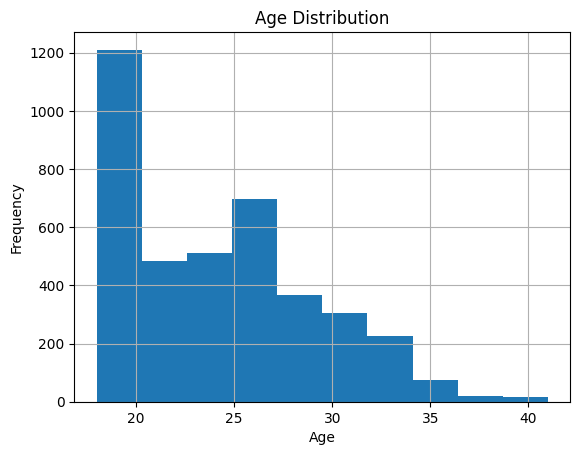

In [14]:
df['Age'].hist()
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Box Plots

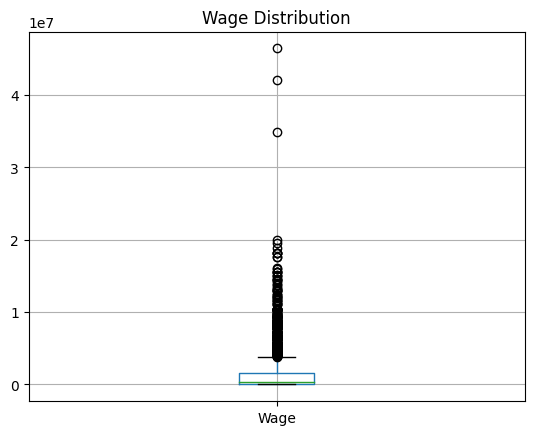

In [15]:
df.boxplot(column=['Wage'])
plt.title('Wage Distribution')
plt.show()


Scatter Plots

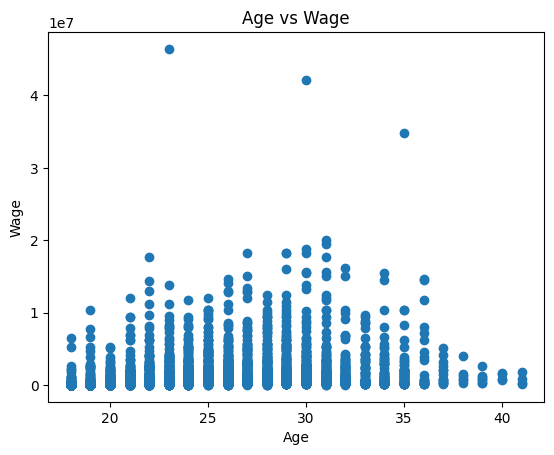

In [16]:
plt.scatter(df['Age'], df['Wage'])
plt.title('Age vs Wage')
plt.xlabel('Age')
plt.ylabel('Wage')
plt.show()


From the above graphs and plots ,we can deduce the following :

1.The majority of players are between the ages of 20 and 30.
There are a few players who are outliers, earning very high wages at a young age.
2.The highest wages are earned by players in their late 20s and early 30s.

3.There are a few players who are still earning high wages in their late 30s and early 40s.

NB: There exist variations in the data and this means that there are other factors that affects the players' wages

**Categorical Data Analysis**

In [17]:
# Identify categorical features
categorical_features = df.select_dtypes(include=['object']).columns
print(categorical_features)

Index(['Club', 'League', 'Nation', 'Position'], dtype='object')


In [18]:
# Calculate the number of unique values for each categorical feature
print(df[categorical_features].nunique())

Club        116
League        6
Nation      114
Position      4
dtype: int64


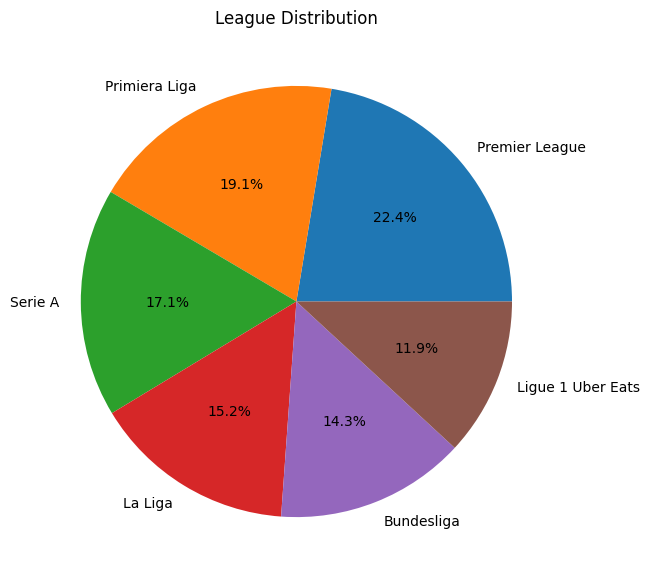

In [19]:
#League distribution pie chart
import matplotlib.pyplot as plt
league_counts = df['League'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(league_counts, labels=league_counts.index, autopct='%1.1f%%')
plt.title('League Distribution')
plt.show()


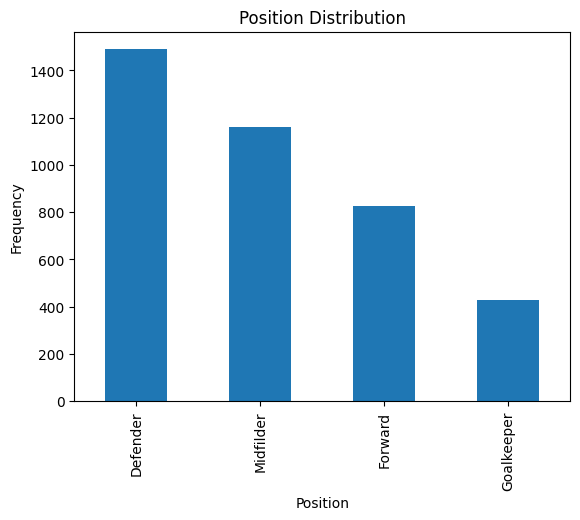

In [20]:
#Player Positions distribution
df['Position'].value_counts().plot(kind='bar')
plt.title('Position Distribution')
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.show()

From the above bar chat of Players' Positions Distribution, we deduce the following ⁉

The most common position is "Defender", followed by "Midfielder", "Forward" and "Goalkeeper".

This suggests that there is a higher demand for midfielders and defenders in these leagues compared to other positions.
The higher number of defenders and midfielders in the top 6 leagues compared to forwards and goalkeepers can be attributed to common team formations and tactical strategies in football. Here are the key reasons based on team formations:
1. Team Formations
Typical football formations require more defenders and midfielders than forwards and goalkeepers. Here are some common formations and their configurations:

**4-4-2 Formation**:

4 Defenders
4 Midfielders
2 Forwards
1 Goalkeeper

**4-3-3 Formation**:

4 Defenders
3 Midfielders
3 Forwards
1 Goalkeeper
3-5-2 Formation:

3 Defenders
5 Midfielders
2 Forwards
1 Goalkeeper

**2. Tactical Flexibility**

Midfielders' Roles: Midfielders are crucial for both defense and attack. They help in transitioning the ball from defense to midfield to attack

It could also indicate that there are more talented midfielders and defenders available in the player pool.

The fewer number of Fowards and GoalKeepers could be due to the specialized nature of these positions and the limited number of players who excel in them.


**Correlation Analysis**

Correlation Matrix

In [21]:
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])


In [22]:
# Calculate the correlation matrix for numerical features
correlation_matrix = numerical_df.corr()
print(correlation_matrix)

          Wage       Age      Apps      Caps
Wage  1.000000  0.317644  0.418255  0.564621
Age   0.317644  1.000000  0.926338  0.454460
Apps  0.418255  0.926338  1.000000  0.531692
Caps  0.564621  0.454460  0.531692  1.000000


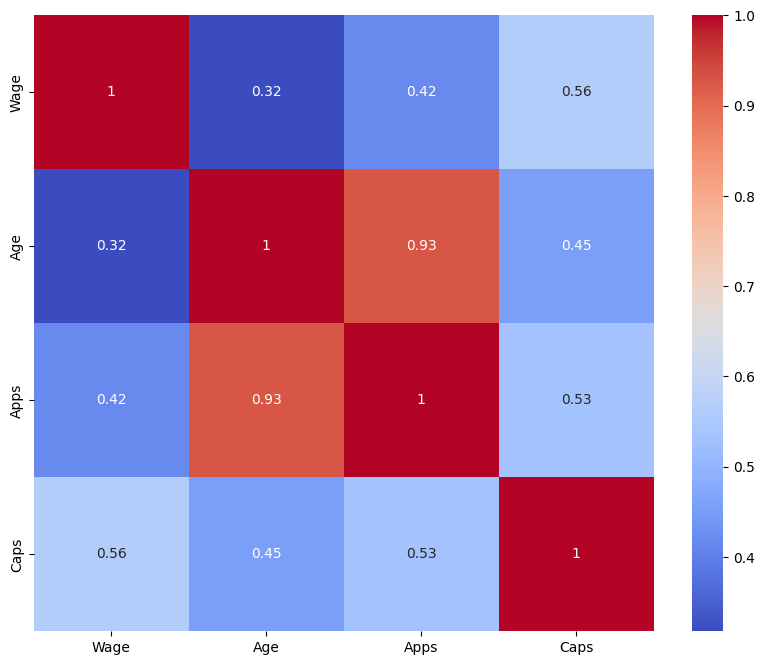

In [23]:
# Visualize the correlation matrix using a heatmap
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

 From the correlation matrix, we can observe the following:

 1. Strong Positive Correlation:

**Apps and Wage**: There is a strong positive correlation between the number of appearances (Apps) and Wage. This suggests that players who make more appearances for their clubs tend to earn higher wages.

2. Moderate Positive Correlation:

**Age and Wage**: There is a moderate positive correlation between Age and Wage. This indicates that older players, with more experience, generally command higher wages.

3. Weak Positive Correlation:

**Caps and Wage**: There is a weak positive correlation between the number of international caps and Wage. This suggests that players who have earned more international caps tend to earn slightly higher wages.

4. Weak Negative Correlation:

There are no significant negative correlations observed in the provided data.

**Interpretation:**

The strong positive correlation between Apps and Wage suggests that performance and playing time are important factors in determining a player's wage.

The moderate positive correlation between Age and Wage indicates that experience and seniority also play a role in wage determination.

The weak positive correlation between Caps and Wage suggests that international recognition and performance may have a slight influence on wages.

**NB**
 It's important to consider other factors beyond these correlations when analyzing player wages, such as individual performance, club performance, league reputation, and market dynamics.



**Comparative Analysis**

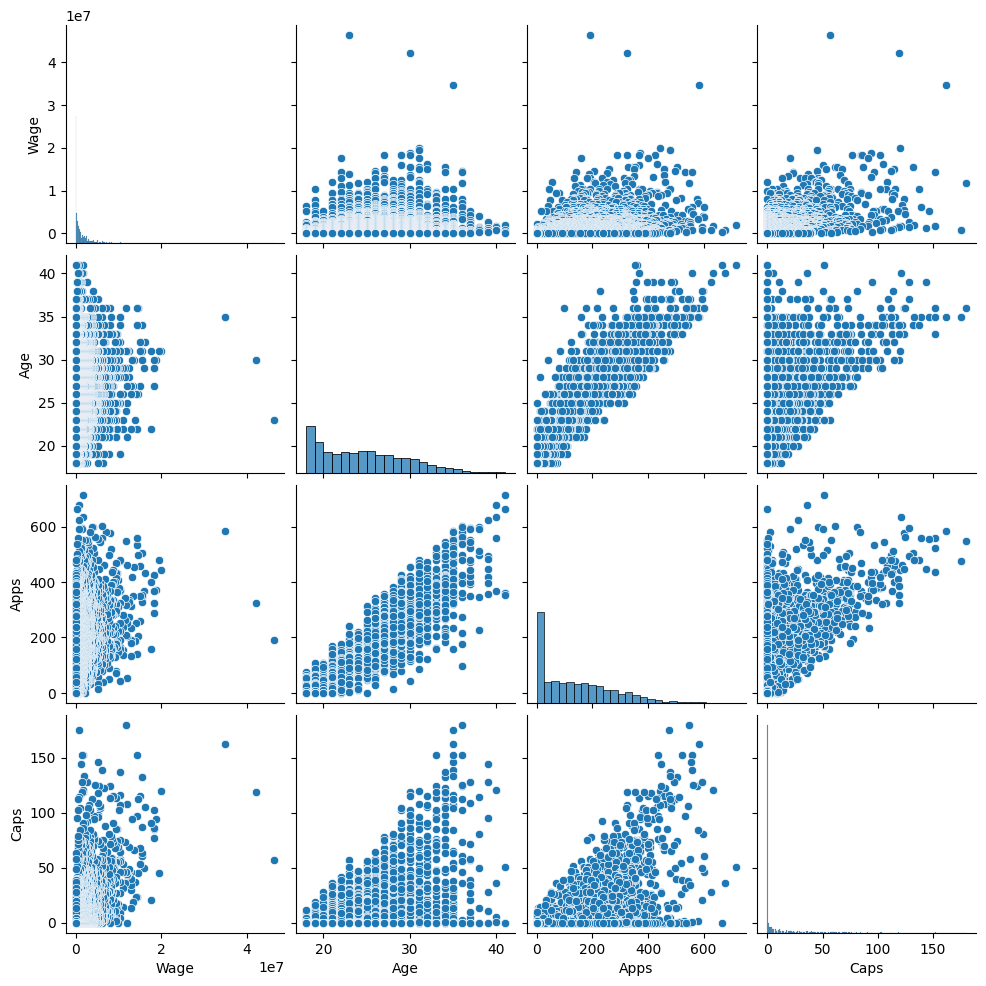

In [24]:
#Identifying Patterns and Relationships:
#Pair Plots
sns.pairplot(df)
plt.show()


In [25]:
df[df['Club'] == 'Man UFC']

,Wage,Age,Club,League,Nation,Position,Apps,Caps
4,19500000,31,Man UFC,Premier League,ESP,Goalkeeper,480,45
9,18200000,29,Man UFC,Premier League,FRA,Defender,287,86
15,15600000,30,Man UFC,Premier League,BRA,Midfilder,328,63
25,14300000,22,Man UFC,Premier League,ENG,Midfilder,141,23
31,13000000,26,Man UFC,Premier League,FRA,Forward,236,30
32,13000000,27,Man UFC,Premier League,POR,Midfilder,313,46
45,11700000,24,Man UFC,Premier League,ENG,Forward,210,46
53,10400000,29,Man UFC,Premier League,ENG,Defender,374,46
92,8840000,27,Man UFC,Premier League,ENG,Defender,212,21
93,8840000,30,Man UFC,Premier League,DEN,Midfilder,399,115


**Top 3 Leagues**

In [26]:
#Best 3 Leagues in the world
selected_leagues = ['La Liga', 'Premier League', 'Bundesliga']
Top_3_Leagues_df = df[df['League'].isin(selected_leagues)]
Top_3_Leagues_df

,Wage,Age,Club,League,Nation,Position,Apps,Caps
3,19959000,31,R. Madrid,La Liga,BEL,Forward,443,120
4,19500000,31,Man UFC,Premier League,ESP,Goalkeeper,480,45
5,18810000,30,R. Madrid,La Liga,AUT,Defender,371,94
7,18200000,30,Liverpool,Premier League,EGY,Forward,367,85
8,18200000,27,Chelsea,Premier League,ENG,Midfilder,326,77
...,...,...,...,...,...,...,...,...
3901,3600,18,Vigo,La Liga,ESP,Defender,0,0
3902,3400,19,Vigo,La Liga,ESP,Defender,0,0
3904,2900,18,Vigo,La Liga,ESP,Forward,0,0
3905,2700,18,Vigo,La Liga,ESP,Defender,0,0


In [27]:
#Average Wages Vs Position in the Top 3 Leagues
fig1= px.bar(Top_3_Leagues_df, x='Position', y='Wage', color='League', barmode='group',
             title = "Average Wages by Position Top Three Leagues in the World ")
fig1.update_yaxes(type="category", categoryorder="total ascending")
fig1.show()

**5.Feature Engineering**

a. Handling Missing Values

In [28]:
# Impute missing values if necessary
numerical_df = df.select_dtypes(include=['number'])
numerical_df.fillna(numerical_df.mean(), inplace=True)

# Alternatively, fill missing values with the mode for categorical columns
categorical_features = df.select_dtypes(exclude=['number']).columns
for feature in categorical_features:
    df[feature].fillna(df[feature].mode()[0], inplace=True)

b. Encoding Categorical Features

In [29]:
# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=categorical_features)
print(df_encoded.head())


       Wage  Age  Apps  Caps  Club_1. FC Koln  Club_A. Bilbao  Club_A. Madrid  \
0  46427000   23   190    57            False           False           False   
1  42125000   30   324   119            False           False           False   
2  34821000   35   585   162            False           False           False   
3  19959000   31   443   120            False           False           False   
4  19500000   31   480    45            False           False           False   

   Club_AC Ajaccio  Club_AJ Auxerre  Club_AS Monaco  ...  Nation_USA  \
0            False            False           False  ...       False   
1            False            False           False  ...       False   
2            False            False           False  ...       False   
3            False            False           False  ...       False   
4            False            False           False  ...       False   

   Nation_UZB  Nation_VEN  Nation_WAL  Nation_ZAM  Nation_ZIM  \
0       False  

c. Feature Scaling

In [30]:
# Scale numerical features if necessary
from sklearn.preprocessing import StandardScaler

numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()

df[numerical_features] = scaler.fit_transform(df[numerical_features])
print(df.head())


        Wage       Age       Club             League Nation    Position  \
0  17.400502 -0.227062        PSG  Ligue 1 Uber Eats    FRA     Forward   
1  15.739194  1.191376        PSG  Ligue 1 Uber Eats    BRA   Midfilder   
2  12.918600  2.204546        PSG  Ligue 1 Uber Eats    ARG     Forward   
3   7.179324  1.394010  R. Madrid            La Liga    BEL     Forward   
4   7.002071  1.394010    Man UFC     Premier League    ESP  Goalkeeper   

       Apps      Caps  
0  0.379282  2.343263  
1  1.396919  5.365352  
2  3.379034  7.461317  
3  2.300642  5.414095  
4  2.581631  1.758342  


**Model Selection**

**Random Forest Regression**

Random Forest Regression is an ensemble  supervised learning model that combines multiple decision trees to improve the accuracy and robustness of predictions. It is particularly useful for regression tasks where the goal is to predict a continuous outcome variable

**Prepare the Data**

Split your data into features (X) and the target variable (y), then split these into training and testing sets. It's also a good practice to scale your features if they are on different scales.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select features and target
X = df_encoded.drop('Wage', axis=1)
y = df_encoded['Wage']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Implement Random Forest Regression**

In [32]:
from sklearn.ensemble import RandomForestRegressor
# Initialize the model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=16)



In [33]:
# Train the model
rf_reg.fit(X_train_scaled, y_train)



RandomForestRegressor(random_state=16)

In [34]:
# Make predictions
predictions = rf_reg.predict(X_test_scaled)

**Model Evaluation**

Evaluate the model's performance using appropriate metrics. For regression tasks, common metrics include Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared.

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Absolute Error: 593588.9312203142
Mean Squared Error: 1622269042046.471
R^2 Score: 0.7399435908503291


Based on the results of your Random Forest Regression model:

Mean Absolute Error (MAE): The average absolute difference between the predicted wages and the actual wages is approximately 593,589 units (currency, most likely).

Mean Squared Error (MSE): The MSE, which is significantly larger than the MAE, indicates the average squared difference between the predicted and actual wages, approximately 1.622 trillion squared units (currency^2).

R-squared (R^2) Score: This score of approximately 0.740 suggests that your model explains about 74% of the variance in the wages. In other words, the model fits the data fairly well, explaining a substantial portion of the variability in the wage data.

In General ,

The MAE indicates the average magnitude of errors in wage predictions.
The MSE shows a higher error due to the squaring of errors, giving more weight to larger errors.
The R^2 score suggests good explanatory power, capturing 74% of the variance in the wages.